<a href="https://colab.research.google.com/github/lloyd31/CNNDetection/blob/master/CNNBasedDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
##Clone the CNN repo
!git clone https://github.com/lloyd31/CNNDetection.git

Cloning into 'CNNDetection'...
remote: Enumerating objects: 664, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 664 (delta 17), reused 23 (delta 9), pack-reused 626
Receiving objects: 100% (664/664), 6.38 MiB | 3.07 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [43]:
%cd /content/CNNDetection
%pip install -r requirements.txt
!bash weights/download_weights.sh
%cd /content

/content/CNNDetection
--2022-03-19 11:02:17--  https://www.dropbox.com/s/2g2jagq2jn1fd0i/blur_jpg_prob0.5.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2g2jagq2jn1fd0i/blur_jpg_prob0.5.pth [following]
--2022-03-19 11:02:17--  https://www.dropbox.com/s/raw/2g2jagq2jn1fd0i/blur_jpg_prob0.5.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc84e2e9659bcacd5500c20222c1.dl.dropboxusercontent.com/cd/0/inline/BhwIMaOf_-KOZ_YLXEqFFOBMbePT1TRpCOqklDTtm2njo66N8m6JD19IEY1py2mJva7cV_5jAeXXS7LNfTwp12MUv6TWqrq63ah_E2dNbGEGAHyedqNwlqO0SFmCV_p7jgJgVvv0xsG9XjxDMVrj3P6P_Rhe7lCtP5Gb__7Zi2a2xg/file# [following]
--2022-03-19 11:02:17--  https://uc84e2e9659bcacd5500c20222c1.dl.dropboxusercontent.com/cd/0/inline/BhwIMaOf_-KOZ_

In [44]:
!git clone https://github.com/lloyd31/gan-analysis-db.git

fatal: destination path 'gan-analysis-db' already exists and is not an empty directory.


In [45]:
!ls -l

total 12
drwxr-xr-x 11 root root 4096 Mar 19 11:02 CNNDetection
drwxr-xr-x  9 root root 4096 Mar 19 07:52 gan-analysis-db
drwxr-xr-x  1 root root 4096 Mar  9 14:48 sample_data


**Phase I: Overall real + Fake set up**

In [46]:
import os
import shutil

In [47]:
mysys = {
    'testDir':'',
    'realPathSuffix':'',
    'fakePathSuffix':'',
    
    'cnnPeopleRealPath':'/content/gan-analysis-db/cnnTest/person/0_real/',
    'cnnPeopleFakePath':'/content/gan-analysis-db/cnnTest/person/1_fake/',

    'cnnCarRealPath':'/content/gan-analysis-db/cnnTest/car/0_real/',
    'cnnCarFakePath':'/content/gan-analysis-db/cnnTest/car/1_fake/',

    'cnnDogRealPath':'/content/gan-analysis-db/cnnTest/dog/0_real/',
    'cnnDogFakePath':'/content/gan-analysis-db/cnnTest/dog/1_fake/',

    'ganPath_100F_fake':'/content/gan-analysis-db/ifakePath/iFakeFaceDB/100F/',
    'ganPath_TPDNE_fake':'/content/gan-analysis-db/ifakePath/iFakeFaceDB/TPDNE/',

    'ganPath_100F_real':'',

    'pgGANPath_fake':'/content/gan-analysis-db/pggan_v2/test/',
    'styleGANPath_fake':'/content/gan-analysis-db/stylegan_celeba/test/',
    'starGANPath_fake':'/content/gan-analysis-db/stargan/validation/',

    'ffhqPath_real':'/content/gan-analysis-db/ffhqTest/ffhq/test/'
}

In [48]:
def makeTestFolder():
  os.makedirs(os.path.join(mysys['testDir'], mysys['realPathSuffix']))
  print('REAL PATH: +1')
  os.makedirs(os.path.join(mysys['testDir'],mysys['fakePathSuffix']))
  print('FAKE PATH: +1')


In [49]:
def cleanUpTestFolder():
  if os.path.isdir(mysys['testDir']):
    shutil.rmtree(mysys['testDir'])
    print('CLEANUP OF:'+mysys['testDir']+': +1')

In [50]:
def setUpCNNApp():
  mysys['testDir'] = '/content/CNNDetection/testDir'
  mysys['realPathSuffix'] = '0_real'
  mysys['fakePathSuffix'] = '1_fake'
  makeTestFolder()

In [51]:
def copyTree(srcFolder, destFolder,limit=-1,pfx=''):
  if(os.path.exists(destFolder) == False):
    os.makedirs(destFolder)
  cnt =0
  
  for file in os.listdir(srcFolder):
    dfile=file

    if(os.path.exists(os.path.join(destFolder,file))):
      dfile=pfx+file

    shutil.copy2(os.path.join(srcFolder,file), os.path.join(destFolder,dfile))
    cnt+=1;
    if limit != -1 and limit < cnt:
      break

  print('files copied: ',srcFolder,' --> ',destFolder,': ',cnt)

In [52]:
##Phase I aims at including all the images available in the dataset and running a test against them
## Maintaining a ratio of real to fake as 0.24 as described in Dang et. al
def setUpPhase_1():
  if os.path.isdir(mysys['testDir']):
    cleanUpTestFolder()
  setUpCNNApp()

  #copy real to testDir/real
  copyTree(srcFolder= mysys['cnnCarRealPath'], destFolder=os.path.join(mysys['testDir'],mysys['realPathSuffix']), pfx='d',limit=200)
  copyTree(srcFolder= mysys['cnnDogRealPath'], destFolder=os.path.join(mysys['testDir'],mysys['realPathSuffix']), pfx='d',limit=200)
  copyTree(srcFolder= mysys['cnnPeopleRealPath'], destFolder=os.path.join(mysys['testDir'],mysys['realPathSuffix']), pfx='p', limit=200)
  copyTree(srcFolder= mysys['ffhqPath_real'], destFolder=os.path.join(mysys['testDir'],mysys['realPathSuffix']))

  #copy fake to testDIR/fake
  copyTree(srcFolder= mysys['cnnCarFakePath'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']),pfx='c')
  copyTree(srcFolder= mysys['cnnDogFakePath'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']),pfx='d')
  copyTree(srcFolder= mysys['cnnPeopleFakePath'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']),pfx='p')

  copyTree(srcFolder= mysys['ganPath_100F_fake'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']))
  copyTree(srcFolder= mysys['ganPath_TPDNE_fake'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']))
  
  copyTree(srcFolder= mysys['pgGANPath_fake'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']))
  copyTree(srcFolder= mysys['styleGANPath_fake'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']))
  copyTree(srcFolder= mysys['starGANPath_fake'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']))

  fakeCount = len(os.listdir(os.path.join(mysys['testDir'],mysys['fakePathSuffix'])))
  realCount = len(os.listdir(os.path.join(mysys['testDir'],mysys['realPathSuffix'])))
  print('Fakes count: ',fakeCount)
  print('Real count: ',realCount)
  print('Real to Fake Ratio: {:.3f}'.format(realCount/fakeCount))

In [56]:
%cd /content/CNNDetection

/content/CNNDetection


In [57]:
!git pull origin master

From https://github.com/lloyd31/CNNDetection
 * branch            master     -> FETCH_HEAD
Already up to date.


In [58]:
%cd ../

/content


In [59]:
setUpPhase_1()

CLEANUP OF:/content/CNNDetection/testDir: +1
REAL PATH: +1
FAKE PATH: +1
files copied:  /content/gan-analysis-db/cnnTest/car/0_real/  -->  /content/CNNDetection/testDir/0_real :  200
files copied:  /content/gan-analysis-db/cnnTest/dog/0_real/  -->  /content/CNNDetection/testDir/0_real :  200
files copied:  /content/gan-analysis-db/cnnTest/person/0_real/  -->  /content/CNNDetection/testDir/0_real :  200
files copied:  /content/gan-analysis-db/ffhqTest/ffhq/test/  -->  /content/CNNDetection/testDir/0_real :  1000
files copied:  /content/gan-analysis-db/cnnTest/car/1_fake/  -->  /content/CNNDetection/testDir/1_fake :  200
files copied:  /content/gan-analysis-db/cnnTest/dog/1_fake/  -->  /content/CNNDetection/testDir/1_fake :  200
files copied:  /content/gan-analysis-db/cnnTest/person/1_fake/  -->  /content/CNNDetection/testDir/1_fake :  200
files copied:  /content/gan-analysis-db/ifakePath/iFakeFaceDB/100F/  -->  /content/CNNDetection/testDir/1_fake :  2000
files copied:  /content/gan-ana

/content/CNNDetection


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Not cropping
Loading [1] datasets


100%|██████████| 257/257 [00:29<00:00,  8.83it/s]


Average sizes: [224.00+/-0.00] x [224.00+/-0.00] = [0.05+/-0.00 Mpix]
Num reals: 1600, Num fakes: 6596
AP: 95.62, Acc: 36.60, Acc (real): 99.88, Acc (fake): 21.26, AUC: 84.66
------CONFUSION MATRIX------
[[1598    2]
 [5194 1402]]
----------------------------


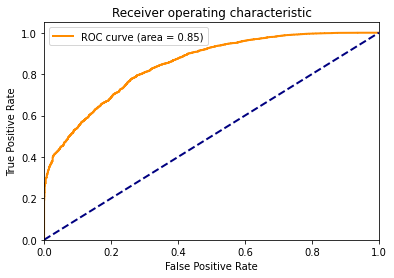

In [61]:
##Testing with model 1: 0.5% JPEG Compression
%cd /content/CNNDetection/
%run demo_dir.py -d testDir -m weights/blur_jpg_prob0.5.pth

In [62]:
##Based on the Confusion Matrix Recall calculated is
print('Sensitivity',(1402/(5194+1402)))

##This is similar to the fake accuracy calculated by the model

Sensitivity 0.21255306246209824


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Not cropping
Loading [1] datasets


100%|██████████| 257/257 [00:29<00:00,  8.82it/s]


Average sizes: [224.00+/-0.00] x [224.00+/-0.00] = [0.05+/-0.00 Mpix]
Num reals: 1600, Num fakes: 6596
AP: 92.51, Acc: 41.70, Acc (real): 91.00, Acc (fake): 29.75, AUC: 77.92
------CONFUSION MATRIX------
[[1456  144]
 [4634 1962]]
----------------------------


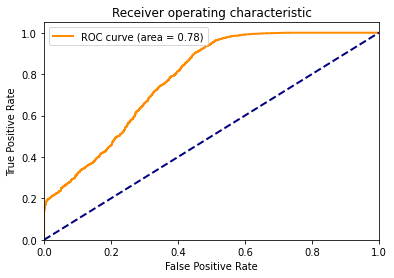

In [63]:
##Testing with model 2: 0.1% JPEG Compression
%run demo_dir.py -d testDir -m weights/blur_jpg_prob0.1.pth

In [65]:
##Sensitivity##
print('Sensitivity: ', (1962/(1962+4634)))

Sensitivity:  0.2974530018192844


In [70]:
##Phase I aims at including the images available in iFakeFaceDB dataset and running a test against them
##The dataset has no real images
def setUpPhase_2():
  
  if os.path.isdir(mysys['testDir']):
    cleanUpTestFolder()
  setUpCNNApp()

  copyTree(srcFolder= mysys['ganPath_100F_fake'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']))
  copyTree(srcFolder= mysys['ganPath_TPDNE_fake'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']))

  copyTree(srcFolder= mysys['ffhqPath_real'], destFolder=os.path.join(mysys['testDir'],mysys['realPathSuffix']),limit=980)

  fakeCount = len(os.listdir(os.path.join(mysys['testDir'],mysys['fakePathSuffix'])))
  realCount = len(os.listdir(os.path.join(mysys['testDir'],mysys['realPathSuffix'])))
  print('Fakes count: ',fakeCount)
  print('Real count: ',realCount)
  print('Real to Fake Ratio: {:.3f}'.format(realCount/fakeCount))

In [72]:
setUpPhase_2()

CLEANUP OF:/content/CNNDetection/testDir: +1
REAL PATH: +1
FAKE PATH: +1
files copied:  /content/gan-analysis-db/ifakePath/iFakeFaceDB/100F/  -->  /content/CNNDetection/testDir/1_fake :  2000
files copied:  /content/gan-analysis-db/ifakePath/iFakeFaceDB/TPDNE/  -->  /content/CNNDetection/testDir/1_fake :  1999
files copied:  /content/gan-analysis-db/ffhqTest/ffhq/test/  -->  /content/CNNDetection/testDir/0_real :  981
Fakes count:  3999
Real count:  981
Real to Fake Ratio: 0.245


/content/CNNDetection


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Not cropping
Loading [1] datasets


100%|██████████| 156/156 [00:14<00:00, 10.68it/s]


Average sizes: [224.00+/-0.00] x [224.00+/-0.00] = [0.05+/-0.00 Mpix]
Num reals: 981, Num fakes: 3999
AP: 88.15, Acc: 19.96, Acc (real): 99.80, Acc (fake): 0.38, AUC: 69.04
------CONFUSION MATRIX------
[[ 979    2]
 [3984   15]]
----------------------------


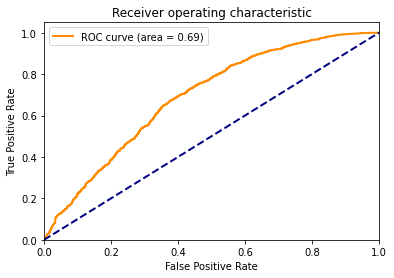

In [74]:
##Testing with model 1: 0.5% JPEG Compression
%cd /content/CNNDetection
%run demo_dir.py -d testDir -m weights/blur_jpg_prob0.5.pth

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Not cropping
Loading [1] datasets


100%|██████████| 156/156 [00:14<00:00, 10.64it/s]


Average sizes: [224.00+/-0.00] x [224.00+/-0.00] = [0.05+/-0.00 Mpix]
Num reals: 981, Num fakes: 3999
AP: 77.73, Acc: 22.45, Acc (real): 85.73, Acc (fake): 6.93, AUC: 51.73
------CONFUSION MATRIX------
[[ 841  140]
 [3722  277]]
----------------------------


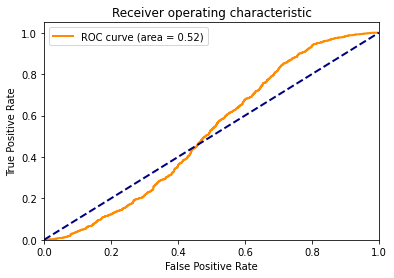

In [75]:
%run demo_dir.py -d testDir -m weights/blur_jpg_prob0.1.pth

Phase 3: Running the build over the DFFD dataset

In [82]:
def setUpPhase_3():
  if os.path.isdir(mysys['testDir']):
    cleanUpTestFolder()
  setUpCNNApp()

  #copy real to testDir/real
  
  copyTree(srcFolder= mysys['ffhqPath_real'], destFolder=os.path.join(mysys['testDir'],mysys['realPathSuffix']),limit=480)

  #copy fake to testDIR/fake
  copyTree(srcFolder= mysys['pgGANPath_fake'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']))
  copyTree(srcFolder= mysys['starGANPath_fake'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']))
  copyTree(srcFolder= mysys['styleGANPath_fake'], destFolder=os.path.join(mysys['testDir'],mysys['fakePathSuffix']))
  
  fakeCount = len(os.listdir(os.path.join(mysys['testDir'],mysys['fakePathSuffix'])))
  realCount = len(os.listdir(os.path.join(mysys['testDir'],mysys['realPathSuffix'])))
  print('Fakes count: ',fakeCount)
  print('Real count: ',realCount)
  print('Real to Fake Ratio: {:.3f}'.format(realCount/fakeCount))

In [83]:
setUpPhase_3()

CLEANUP OF:/content/CNNDetection/testDir: +1
REAL PATH: +1
FAKE PATH: +1
files copied:  /content/gan-analysis-db/ffhqTest/ffhq/test/  -->  /content/CNNDetection/testDir/0_real :  481
files copied:  /content/gan-analysis-db/pggan_v2/test/  -->  /content/CNNDetection/testDir/1_fake :  499
files copied:  /content/gan-analysis-db/stargan/validation/  -->  /content/CNNDetection/testDir/1_fake :  999
files copied:  /content/gan-analysis-db/stylegan_celeba/test/  -->  /content/CNNDetection/testDir/1_fake :  499
Fakes count:  1997
Real count:  481
Real to Fake Ratio: 0.241


/content/CNNDetection


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Not cropping
Loading [1] datasets


100%|██████████| 78/78 [00:12<00:00,  6.02it/s]


Average sizes: [224.00+/-0.00] x [224.00+/-0.00] = [0.05+/-0.00 Mpix]
Num reals: 481, Num fakes: 1997
AP: 98.95, Acc: 51.13, Acc (real): 99.79, Acc (fake): 39.41, AUC: 95.75
------CONFUSION MATRIX------
[[ 480    1]
 [1210  787]]
----------------------------


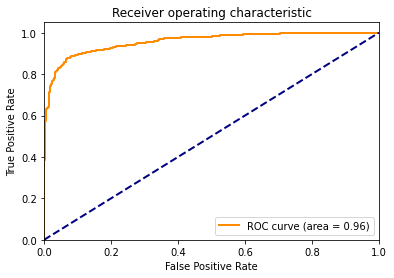

In [84]:
%cd /content/CNNDetection
%run demo_dir.py -d testDir -m weights/blur_jpg_prob0.5.pth

In [88]:
print('Sensitivity: ',(787/(787+1210)))

Sensitivity:  0.3940911367050576


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Not cropping
Loading [1] datasets


100%|██████████| 78/78 [00:12<00:00,  6.10it/s]


Average sizes: [224.00+/-0.00] x [224.00+/-0.00] = [0.05+/-0.00 Mpix]
Num reals: 481, Num fakes: 1997
AP: 94.99, Acc: 60.69, Acc (real): 87.11, Acc (fake): 54.33, AUC: 82.41
------CONFUSION MATRIX------
[[ 419   62]
 [ 912 1085]]
----------------------------


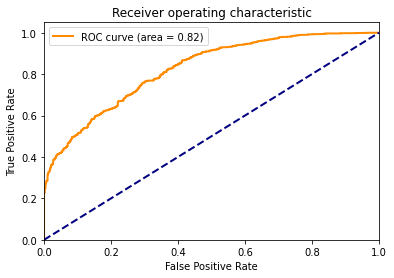

In [86]:
%run demo_dir.py -d testDir -m weights/blur_jpg_prob0.1.pth

In [87]:
print('Sensitivty: ',(1085/(1085+912)))

Sensitivty:  0.543314972458688
